In [1]:
import sys
sys.path.append("..")
sys.path.append("../..")
sys.path.append("../../..")

from python_lib.pkl_saver import PklSaver
out_saver = PklSaver(".", "data_nfs.pkl")
# out_saver = PklSaver(".", "data.pkl")
data_dict = out_saver.load()

print(data_dict)

{'workload_1': {'before': {2: [9, 11, 10, 11, 11, 11, 10, 10, 11, 11], 4: [12, 9, 9, 9, 12, 11, 9, 11, 11, 12], 6: [13, 13, 13, 11, 11, 13, 13, 12, 13, 13], 8: [13, 13, 13, 13, 13, 13, 13, 13, 13, 13], 10: [13, 13, 13, 13, 13, 13, 13, 13, 13, 13], 12: [13, 13, 13, 13, 13, 13, 13, 13, 13, 13], 14: [13, 13, 13, 13, 13, 13, 13, 13, 13, 13], 16: [13, 13, 13, 13, 13, 13, 13, 13, 13, 13], 18: [13, 13, 13, 13, 13, 13, 13, 13, 13, 13], 20: [13, 13, 13, 13, 13, 13, 13, 13, 13, 13]}, 'after': {2: [9, 11, 10, 11, 11, 11, 10, 10, 11, 11], 4: [11, 10, 10, 10, 11, 11, 10, 11, 10, 11], 6: [12, 12, 12, 11, 11, 12, 12, 11, 11, 12], 8: [12, 12, 12, 13, 13, 12, 13, 13, 13, 13], 10: [13, 13, 13, 13, 13, 13, 13, 13, 13, 13], 12: [13, 13, 13, 13, 13, 13, 13, 13, 13, 13], 14: [13, 13, 13, 13, 13, 13, 13, 13, 13, 13], 16: [13, 13, 13, 13, 13, 13, 13, 13, 13, 13], 18: [13, 13, 13, 13, 13, 13, 13, 13, 13, 13], 20: [13, 13, 13, 13, 13, 13, 13, 13, 13, 13]}}, 'workload_2': {'before': {2: [10, 11, 9, 10, 10, 11, 1

In [2]:
plot_data_dict = {}

before = 0
after = 0
for k, v in data_dict.items():
    plot_data_dict[k] = {}
    for bf in ['before', 'after']:
        plot_data_dict[k][bf] = []
        print(k)
        # print(v)
        for sketch_num, p_list in v[bf].items():
            # print(sketch_num)
            feasible_count = 0
            for p in p_list:
                if p <= 12:
                    feasible_count += 1
            if bf == "before":
                before += feasible_count
            else:
                after += feasible_count
            print(sketch_num, feasible_count)
            plot_data_dict[k][bf].append(feasible_count)
                


print(before)
print(after)

workload_1
2 10
4 10
6 3
8 0
10 0
12 0
14 0
16 0
18 0
20 0
workload_1
2 10
4 10
6 10
8 4
10 0
12 0
14 0
16 0
18 0
20 0
workload_2
2 10
4 10
6 9
8 7
10 1
12 1
14 0
16 0
18 0
20 0
workload_2
2 10
4 10
6 10
8 8
10 6
12 4
14 1
16 0
18 2
20 0
workload_3
2 10
4 10
6 8
8 7
10 5
12 2
14 0
16 0
18 0
20 0
workload_3
2 10
4 10
6 8
8 7
10 7
12 3
14 0
16 0
18 0
20 0
workload_4
2 10
4 9
6 10
8 5
10 4
12 2
14 0
16 0
18 0
20 0
workload_4
2 10
4 10
6 10
8 5
10 5
12 2
14 3
16 0
18 0
20 0
workload_5
2 10
4 10
6 7
8 5
10 2
12 1
14 0
16 0
18 0
20 0
workload_5
2 10
4 10
6 10
8 7
10 6
12 2
14 0
16 0
18 0
20 0
178
220


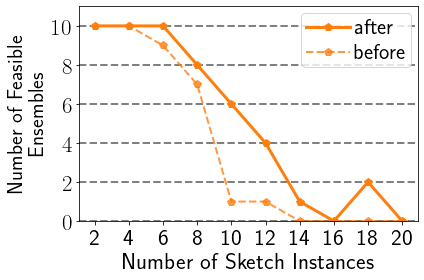

In [13]:

from statistics import median

import matplotlib.pyplot as plt

import matplotlib
matplotlib.rcParams['hatch.linewidth'] = 0.1
matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
width = 0.1

markerst1 = 's'
markerst2 = 'p'
markerst3 = '^'
markerst4 = '*'
markerst5 = '|'

key_list = [i for i in range(2, 21, 2)]

fig, ax = plt.subplots(figsize=(6, 4))
# from matplotlib import gridspec
# plt.figure(figsize=(6, 6))
# gs = gridspec.GridSpec(nrows=2,
#                        ncols=2
#                       )

i = 0
for workload in ["workload_2"]:
    # i += 1
    # if i == 1:
    #     plt.subplot(2, 2, 1)
    # if i == 2:
    #     plt.subplot(2, 2, 2)
    # if i == 3:
    #     plt.subplot(2, 2, 3)
    # if i == 4:
    #     plt.subplot(2, 2, 4)
    # ax = plt.gca()

    for run_name in ["after", "before"]:
        # print(workload, run_name)

        plot_data = plot_data_dict[workload][run_name]
        
        if workload == "workload_1":
            workload_name = "T1"
            marker = markerst1
            color='C0'
            title = "Ensemble Type 1. Same Sketch Algo"
        if workload == "workload_2":
            workload_name = "T2"
            marker = markerst2
            color='C1'
            # title = "Ensemble Type 2. Same Flowkey"
            title = ""
        if workload == "workload_3":
            workload_name = "T3"
            marker = markerst3
            color='C2'
            title = "Ensemble Type 3. Same Flowsize"
        if workload == "workload_4":
            workload_name = "T3"
            marker = markerst3
            color='C2'
            title = "Ensemble Type 3. Same Epoch"
        if workload == "workload_5":
            workload_name = "T4"
            marker = markerst4
            color='C4'
            title = "Ensemble Type 4. Random"
        
        ax.set_title(title, fontsize=23, y=1.05)

        if run_name == "before":
            # label = f"(before) {workload_name}"
            label = f"before"
            linestyle = '--'
            alpha = 0.8
            linewidth=2
        
        elif run_name == "after":
            label = f"after"
            linestyle = '-'
            alpha = 1
            linewidth=3

        ax.plot(key_list, plot_data, label=label, color=color, marker=marker, alpha=alpha, linestyle=linestyle, linewidth=linewidth, markersize=8)

    from matplotlib.ticker import MultipleLocator
    ax.yaxis.set_major_locator(MultipleLocator(2))

    ax.set_ylim([0, 11])

    # plt.xticks(fontsize=30)


    # new_x = [i for i in range(2, 21, 2)]
    # new_x_label = [i for i in range(2, 21, 2)]

    # new_x = [4, 8, 12, 16, 20]
    # new_x_label = [4, 8, 12, 16, 20]

    new_x = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
    # new_x_label = [4, '', 8, '', 12, '', 16, '', 20]
    new_x_label = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]
    # new_x_label = [4, 6, 8, 10, 12, 14, 16, 18, 20]

    ax.set_xticks(new_x)
    ax.set_xticklabels(new_x_label, fontsize=23)
    ax.tick_params(axis='y', labelsize=23)
    ax.set_ylabel('Number of Feasible \n Ensembles', fontsize=21)
    ax.set_xlabel('Number of Sketch Instances', fontsize=23)

    plt.legend(loc='upper right', fontsize=22, ncol=1,
            columnspacing=0.8,
            handleheight=0.3,
            handletextpad=0.2,
            borderaxespad=0.3,
            labelspacing=0.2,
            borderpad=0.2)

    plt.grid(color='gray', linestyle='--', linewidth=2, axis='y')

fig.tight_layout()

import os

# latex_path = "/Users/hnamkung/hun-latex/Hun-multi-dim-sketches/nsdi23/figures/6_evaluation"
# full_path = os.path.join(latex_path, "overall.pdf")

latex_path = "."
full_path = os.path.join(latex_path, "after_l2_l3_ACL_ppt.pdf")

plt.savefig(full_path, bbox_inches='tight', pad_inches=0.02)
plt.show()

